## Batch vs Stochastic Gradient Descent
At this point, it seems that we've seen two ways of doing linear regression.

* By applying the squared (or absolute) trick at every point in our data one by one, and repeating this process many times.
* By applying the squared (or absolute) trick at every point in our data all at the same time, and repeating this process many times.

More specifically, the squared (or absolute) trick, when applied to a point, gives us some values to add to the weights of the model. We can add these values, update our weights, and then apply the squared (or absolute) trick on the next point. Or we can calculate these values for all the points, add them, and then update the weights with the sum of these values.

The latter is called *batch gradient descent*. The former is called *stochastic gradient descent*. 

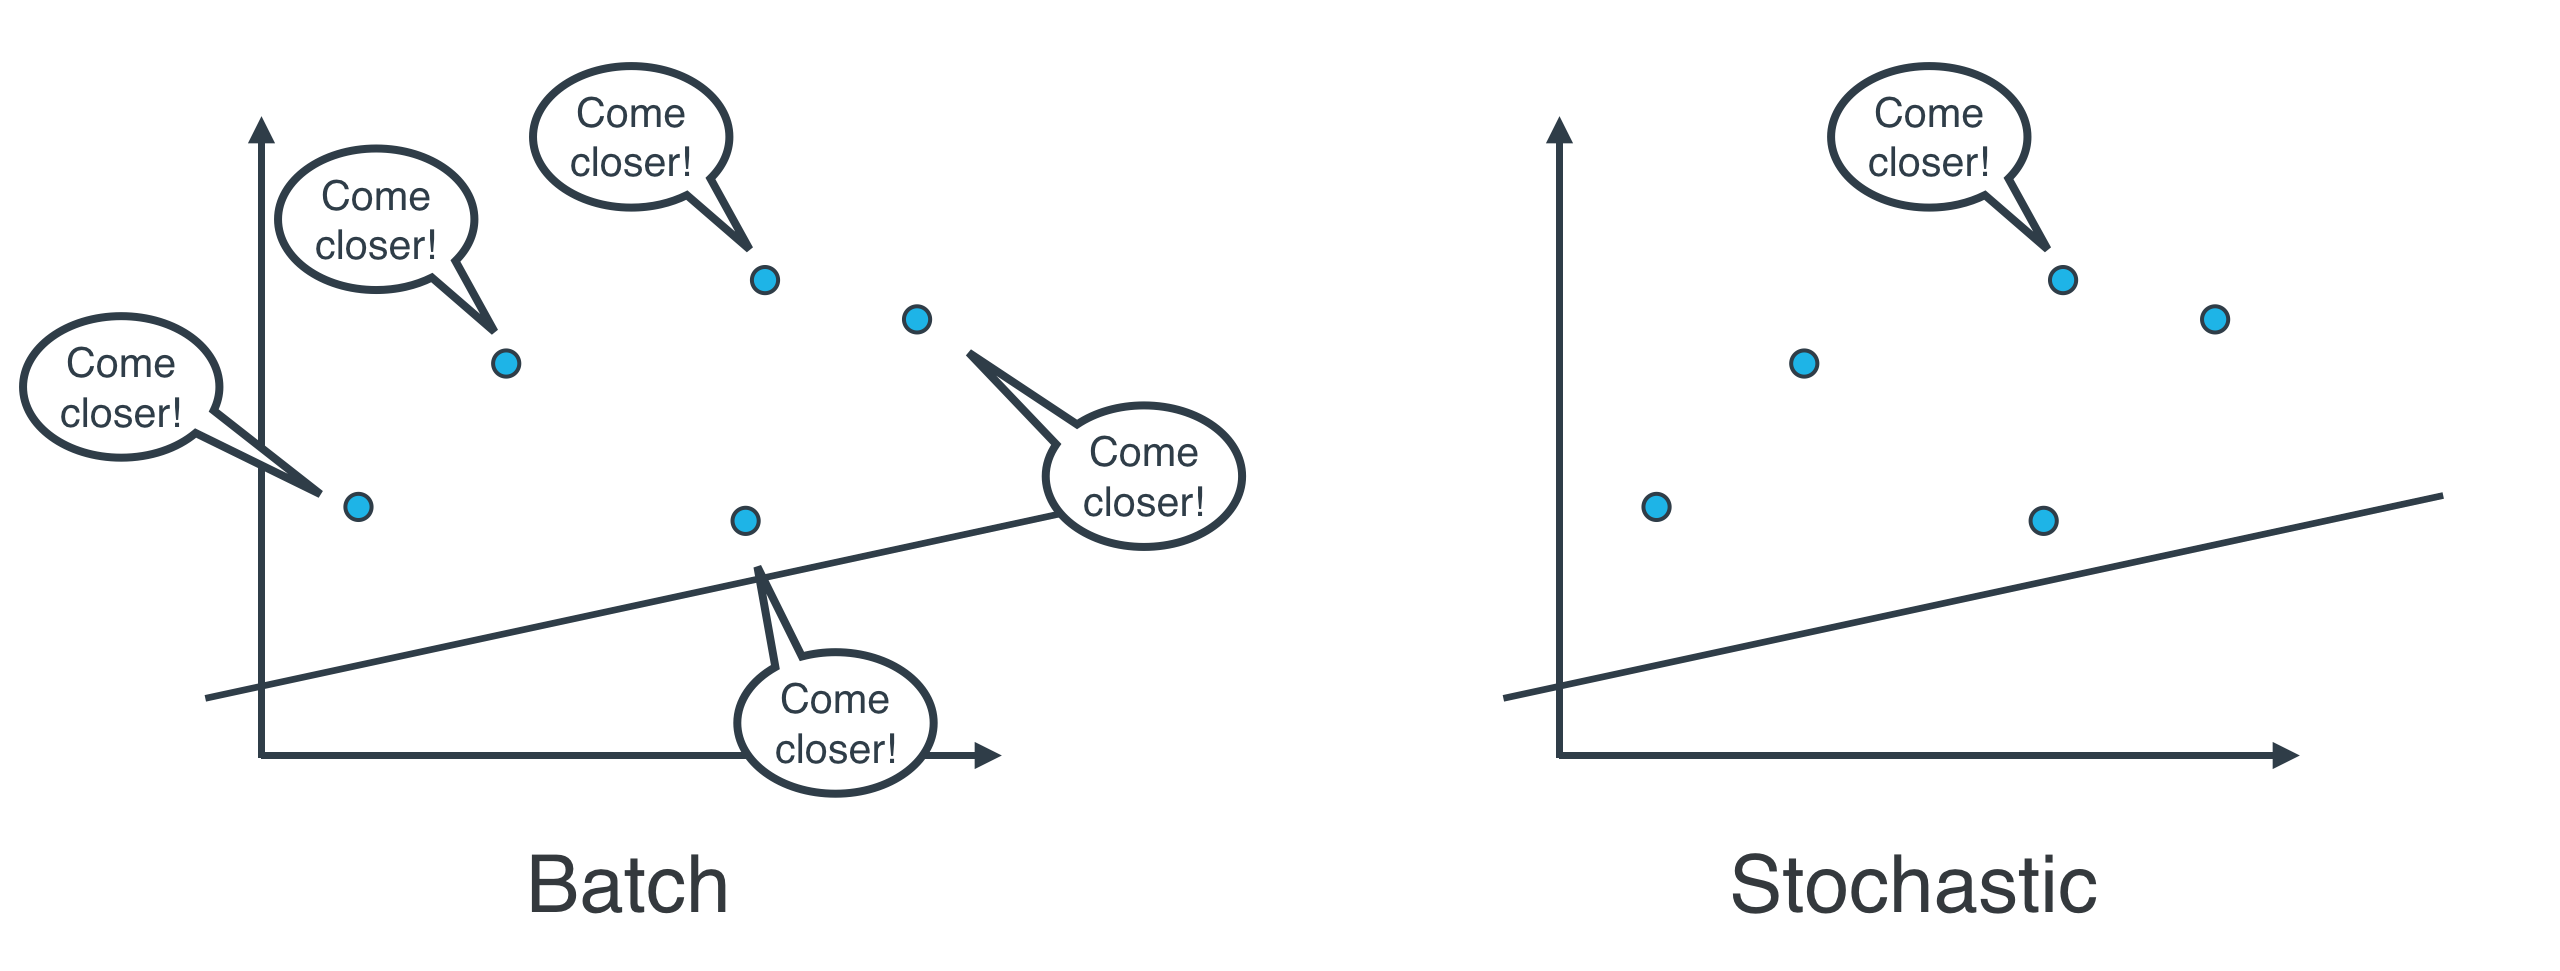

The question is, which one is used in practice?

Actually, in most cases, neither. Think about this: If your data is huge, both are a bit slow, computationally. The best way to do linear regression, is to split your data into many small batches. Each batch, with roughly the same number of points. Then, use each batch to update your weights. This is still called *mini-batch gradient descent*.

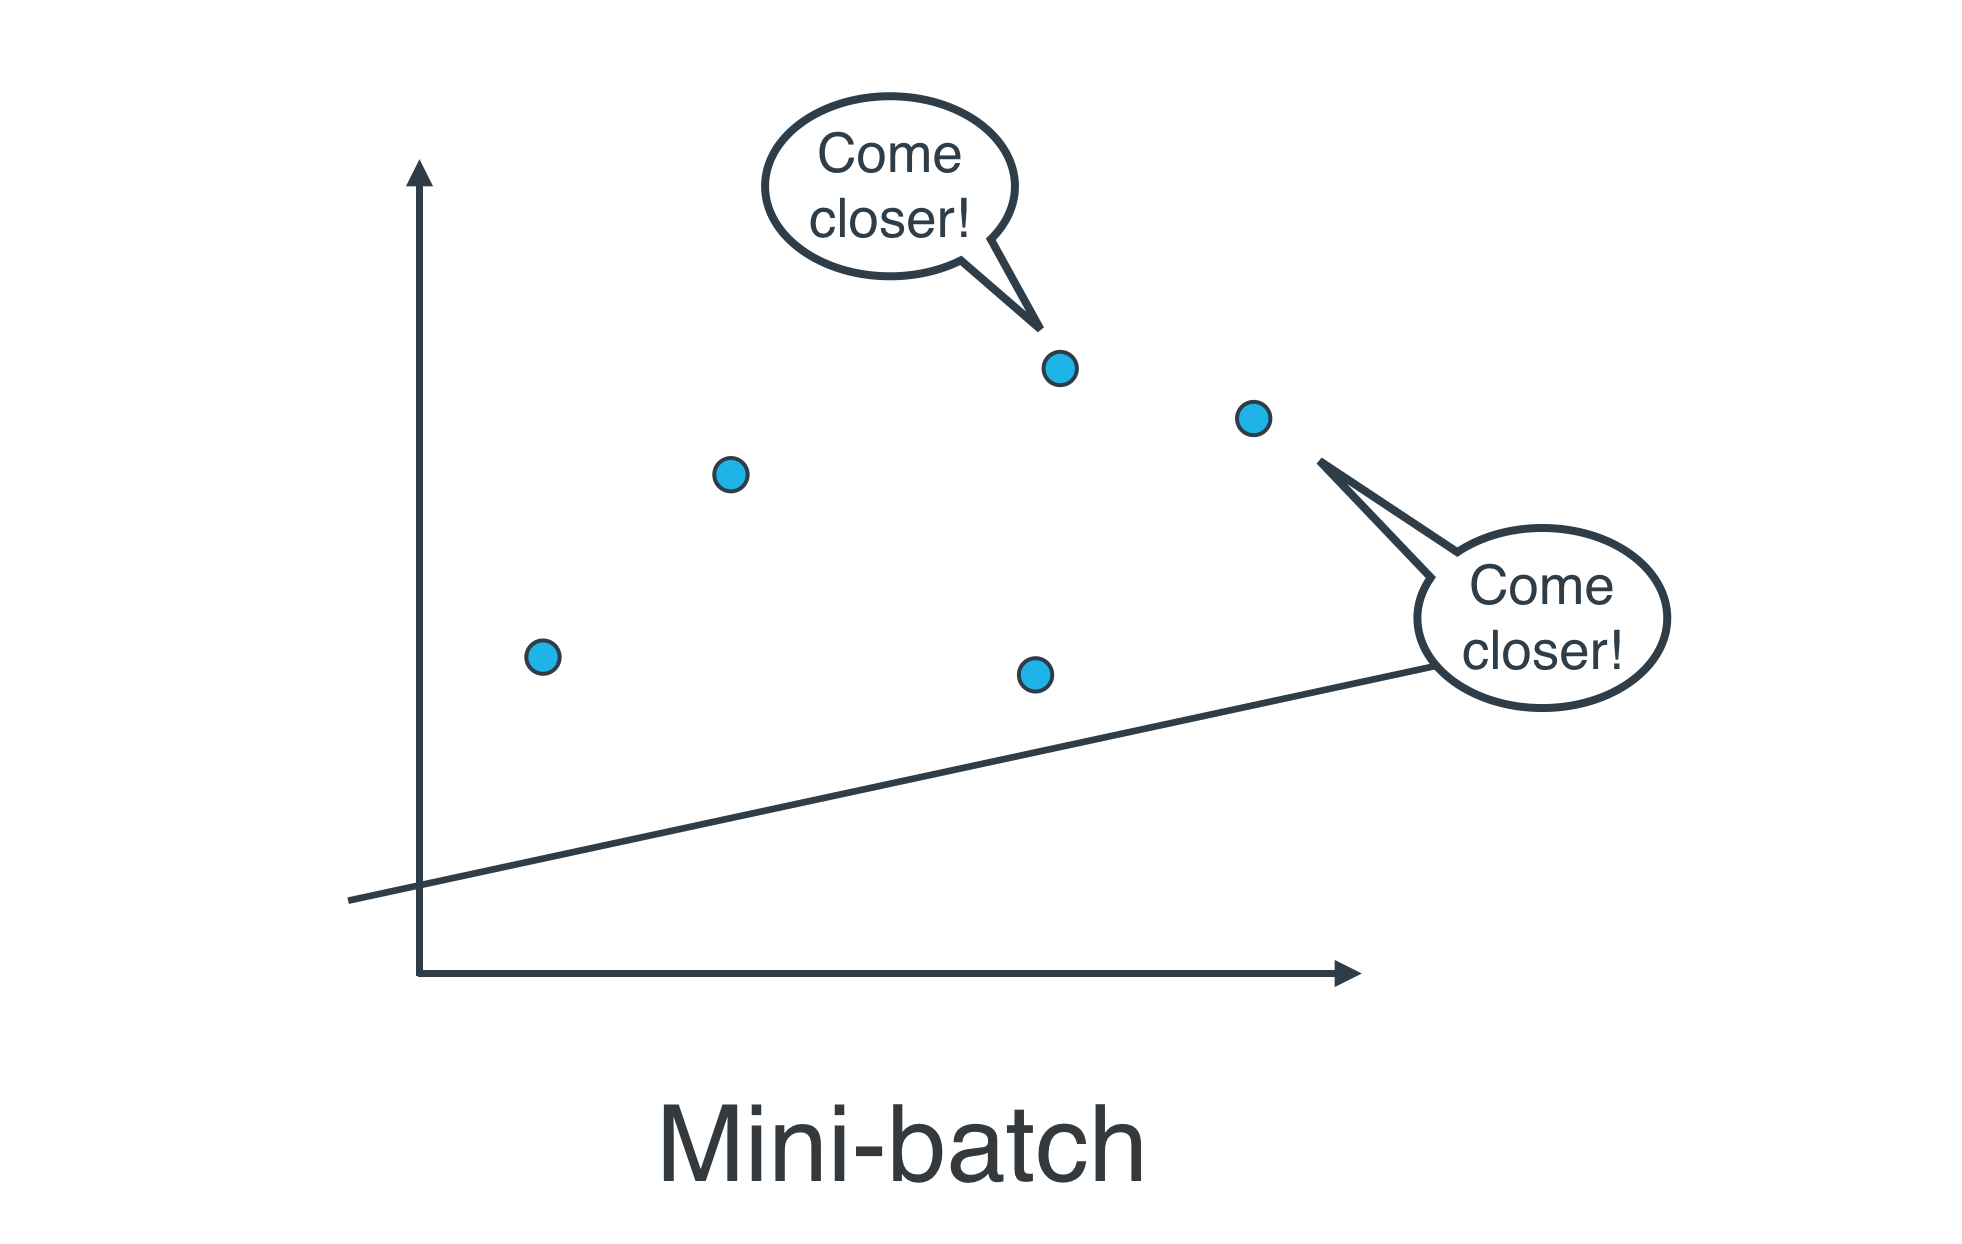

### Mini-Batch Gradient Descent Exercise
In this quiz, you'll be given the following sample dataset (as in data.csv), and your goal is to write a function that executes mini-batch gradient descent to find a best-fitting regression line. You might consider looking into numpy's `matmul` function for this!

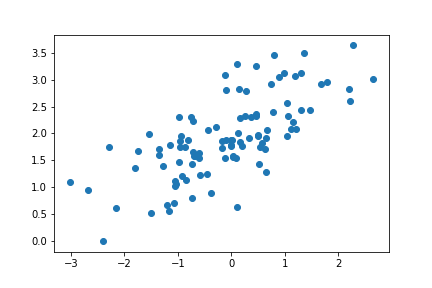

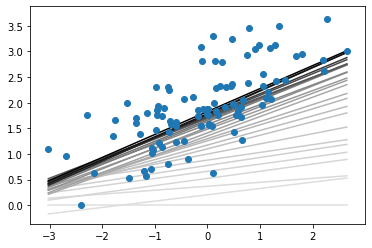

In [2]:
import numpy as np
# Setting a random seed
np.random.seed(42)

def MSEStep(X, y, W, b, learn_rate = 0.005):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.
    
    Parameters
    X : array of predictor features
    y : array of outcome values
    W : predictor feature coefficients
    b : regression function intercept
    learn_rate : learning rate

    Returns
    W_new : predictor feature coefficients following gradient descent step
    b_new : intercept following gradient descent step
    """
    y_predict = np.matmul(X, W) + b
    error = y - y_predict
    W_new = W + learn_rate * np.matmul(error, X)
    b_new = b + learn_rate * error.sum()
    
    return W_new, b_new


# The parts of the script below will be run when you press the "Test Run"
# button. The gradient descent step will be performed multiple times on
# the provided dataset, and the returned list of regression coefficients
# will be plotted.
def miniBatchGD(X, y, batch_size = 20, learn_rate = 0.005, num_iter = 25):
    """
    This function performs mini-batch gradient descent on a given dataset.

    Parameters
    X : array of predictor features
    y : array of outcome values
    batch_size : how many data points will be sampled for each iteration
    learn_rate : learning rate
    num_iter : number of batches used

    Returns
    regression_coef : array of slopes and intercepts generated by gradient
      descent procedure
    """
    n_points = X.shape[0]
    W = np.zeros(X.shape[1]) # coefficients
    b = 0 # intercept
    
    # run iterations
    regression_coef = [np.hstack((W,b))]
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch,:]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W,b)))
    
    return regression_coef


if __name__ == "__main__":
    # perform gradient descent
    data = np.loadtxt('data/mini_batch.csv', delimiter = ',')
    X = data[:,:-1]
    y = data[:,-1]
    regression_coef = miniBatchGD(X, y)
    
    # plot the results
    import matplotlib.pyplot as plt
    
    plt.figure()
    X_min = X.min()
    X_max = X.max()
    counter = len(regression_coef)
    for W, b in regression_coef:
        counter -= 1
        color = [1 - 0.92 ** counter for _ in range(3)]
        plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
    plt.scatter(X, y, zorder = 3)
    plt.show()